In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Import necessary scripts
from scripts.data_quality_checks import (
    load_dataset, handle_anomalies
)

In [2]:
# Load the datasets
df_togo = load_dataset('data/togo-dapaong_qc.csv')

In [3]:
# Handle anomalies in the dataset
handle_anomalies(
    df_togo,
    negative_value_columns=['GHI', 'DNI', 'DHI'],
    outlier_columns=['ModA', 'ModB', 'WS', 'WSgust'],
    lower_percentile=0.05,
    upper_percentile=0.95
)


Missing Values in Each Column:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [4]:
# Convert the Timestamp column to datetime
df_togo['Timestamp'] = pd.to_datetime(df_togo['Timestamp'])

# Set the Timestamp as the index
df_togo.set_index('Timestamp', inplace=True)

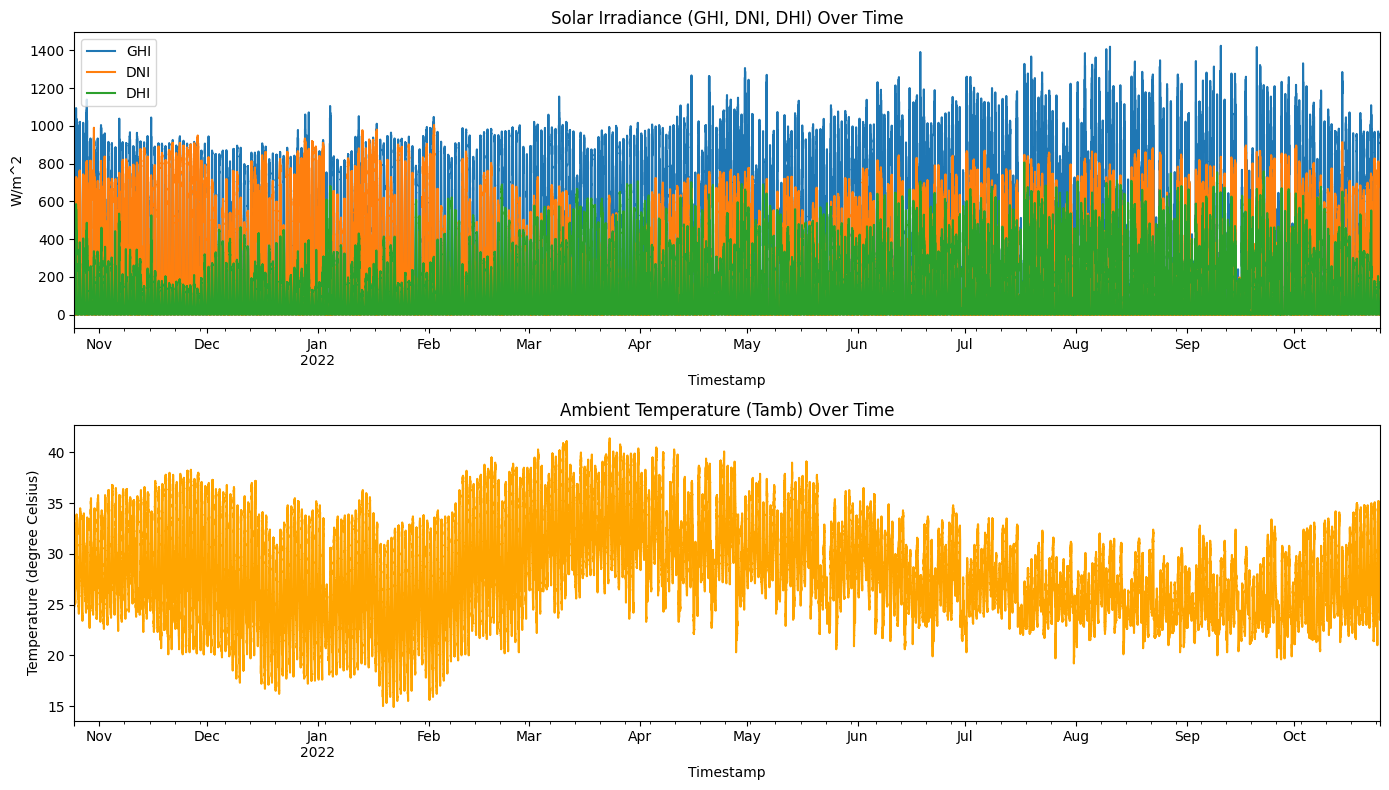

In [5]:
# Plotting GHI, DNI, DHI over time
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
df_togo[['GHI', 'DNI', 'DHI']].plot(ax=plt.gca(), title='Solar Irradiance (GHI, DNI, DHI) Over Time')
plt.ylabel('W/m^2')

plt.subplot(2, 1, 2)
df_togo['Tamb'].plot(ax=plt.gca(), color='orange', title='Ambient Temperature (Tamb) Over Time')
plt.ylabel('Temperature (degree Celsius)')

plt.tight_layout()
plt.show()

### Evaluating the Impact of Cleaning on Sensor Readings (ModA, ModB)

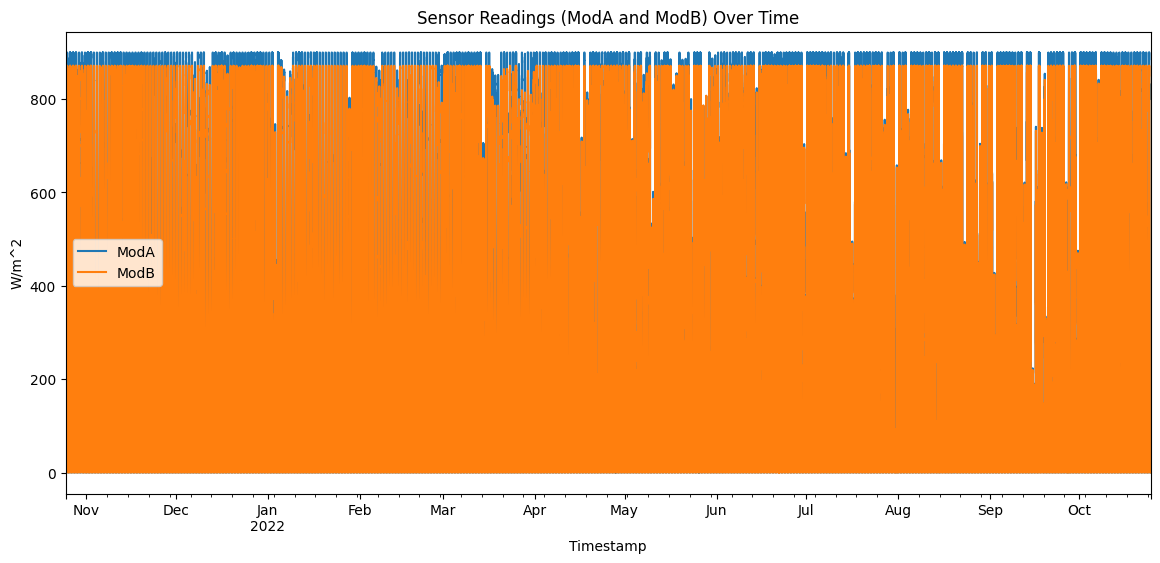

In [6]:
# Plot ModA and ModB over time
plt.figure(figsize=(14, 6))

df_togo[['ModA', 'ModB']].plot(ax=plt.gca(), title='Sensor Readings (ModA and ModB) Over Time')
plt.ylabel('W/m^2')
plt.show()

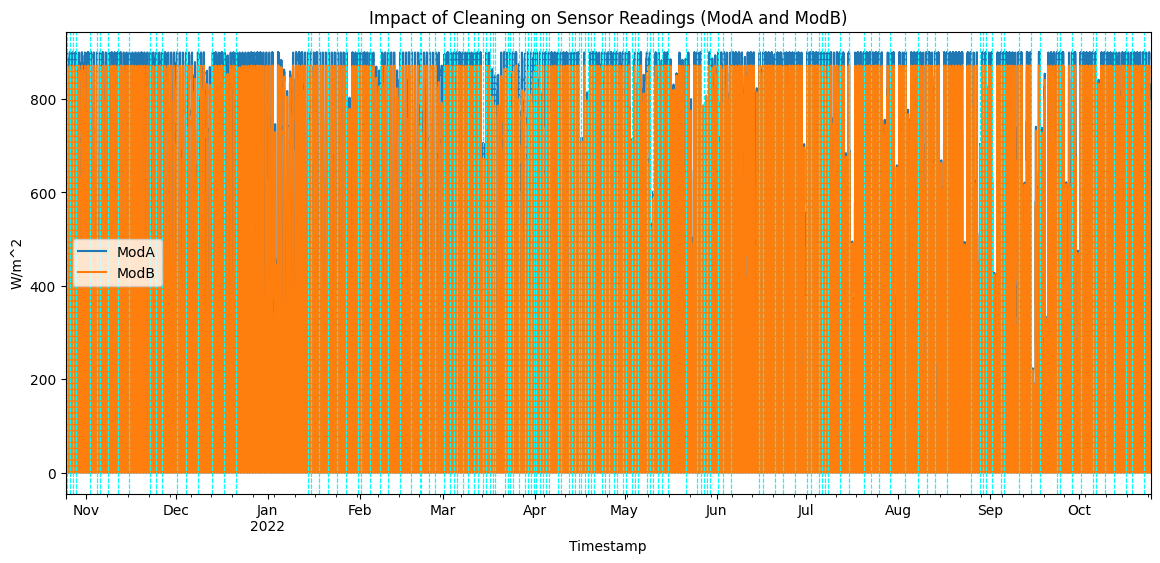

In [7]:
# Plot ModA and ModB with Cleaning events marked
plt.figure(figsize=(14, 6))

df_togo[['ModA', 'ModB']].plot(ax=plt.gca(), title='Impact of Cleaning on Sensor Readings (ModA and ModB)')
plt.ylabel('W/m^2')

# Mark cleaning events
cleaning_times = df_togo[df_togo['Cleaning'] == 1].index
for cleaning_time in cleaning_times:
    plt.axvline(x=cleaning_time, color='cyan', linestyle='--', linewidth=0.8)

plt.show()

## Key Findings from Time Series Analysis and Cleaning Impact - Togo Dataset

### 1. **Solar Irradiance (GHI, DNI, DHI) and Temperature (Tamb) Over Time**
- **Seasonal Trends:** The Togo dataset shows clear seasonal variations in solar irradiance (GHI, DNI, DHI) and ambient temperature (Tamb). Solar irradiance peaks during the warmer months and decreases during cooler periods, consistent with the regional climate patterns in West Africa.
- **Stable Patterns:** The data indicates stable environmental conditions, with consistent seasonal trends and no significant anomalies or outliers in the solar irradiance and temperature data.

### 2. **Sensor Readings (ModA and ModB) Over Time**
- **ModA Sensitivity:** ModA readings exhibit more frequent drops and fluctuations, particularly during certain periods (e.g., December to February and April to June). These drops suggest that ModA is more sensitive to environmental factors such as soiling or weather conditions.
- **ModB Stability:** ModB readings are generally higher and more stable than ModA, indicating that ModB is less affected by environmental factors and maintains better performance overall.

### 3. **Impact of Cleaning on Sensor Readings**
- **Positive Impact on ModA:** Cleaning events have a noticeable positive impact on ModA readings. The regular cleaning schedule helps restore and stabilize ModA readings, particularly after periods of increased fluctuations.
- **ModB Resilience:** While ModB is generally more resilient, it also benefits from regular cleaning, with minor fluctuations recovering after cleaning events. This suggests that cleaning helps maintain the already stable performance of ModB.
- **Seasonal Considerations:** The data shows more pronounced fluctuations during the rainy season (April to June), indicating that more frequent or thorough cleaning may be necessary during this period to maintain sensor accuracy.

### 4. **Overall Observations**
- **Consistent Maintenance:** Regular cleaning is crucial for maintaining sensor accuracy, particularly for ModA, which is more prone to fluctuations due to environmental factors.
- **ModB Robustness:** ModB demonstrates strong resilience and stable performance, though it still benefits from regular maintenance.
- **Seasonal Cleaning Adjustments:** Adjusting the frequency of cleaning during challenging environmental periods, such as the rainy season, could further enhance sensor reliability and performance.